# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc

pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers_scaled_balanced.pkl")
print(df.shape)
df.head()

(1931, 34)


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,0.004549,0.000000,0.245875,0.785714,0.390297,0.00000,0.178571,0.25,0.264825,0.00,0.095678,0.637546,0.111111,0.000000,0.000000,0.026316,1.000000,0.027027,0.000000,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.004549,0.432734,0.253151,0.309524,1.000000,0.03034,0.321429,0.00,0.264825,0.00,1.000000,0.167457,0.000000,0.857143,0.333333,0.157895,0.500000,0.135135,0.066667,0.235294,0.333333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.079618,0.432734,1.000000,0.333333,1.000000,0.03034,0.571429,0.75,0.030030,0.75,0.095678,0.964666,0.111111,0.285714,1.000000,0.131579,0.333333,0.135135,0.000000,0.176471,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.000000,0.000000,0.068670,0.476190,0.000000,0.03034,0.035714,1.00,0.264825,0.50,0.095678,0.385045,0.333333,0.000000,1.000000,0.342105,0.833333,0.216216,0.466667,0.294118,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,1.000000,0.068670,0.333333,0.390297,0.03034,0.321429,0.00,0.250937,0.00,1.000000,0.070195,0.444444,0.071429,0.666667,0.236842,0.333333,0.162162,0.000000,0.235294,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [3]:
vr="Attrition"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

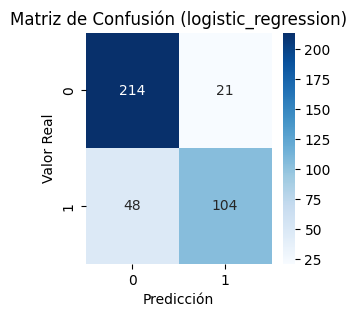

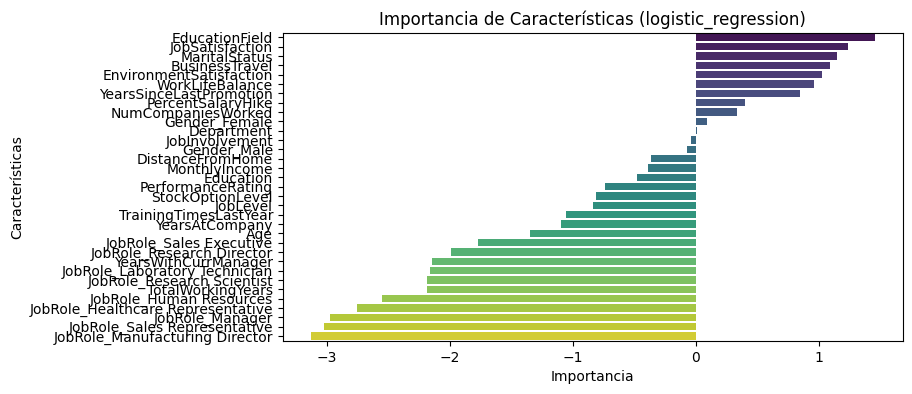

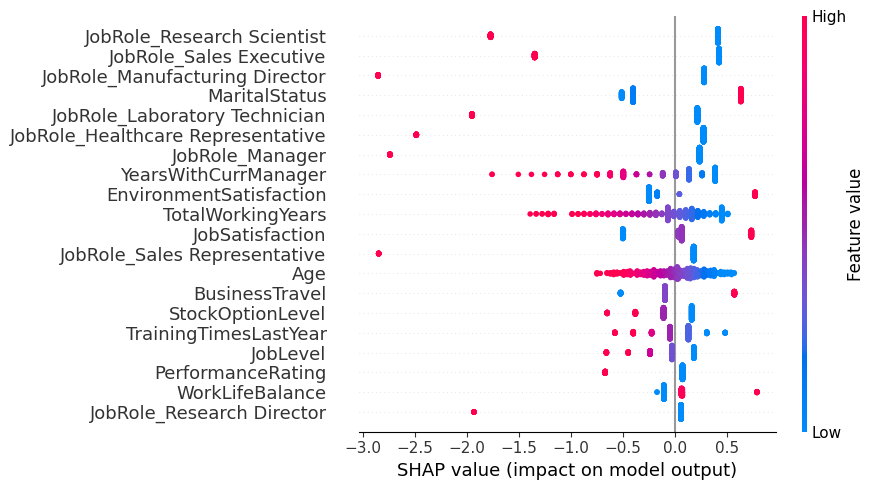

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.841321,0.840302,0.841321,0.838867,0.650894,0.903988,regresion logistica
test,0.821705,0.822766,0.821705,0.817859,0.614113,0.875728,regresion logistica


In [4]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

modelo_clasificacion.plot_matriz_confusion("logistic_regression")
modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)


,accuracy,precision,recall,f1,kappa,auc
train,0.930052,0.930649,0.930052,0.929363,0.847404,0.980757
test,0.772610,0.770345,0.772610,0.768824,0.510788,0.769401


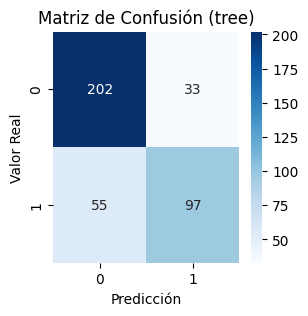

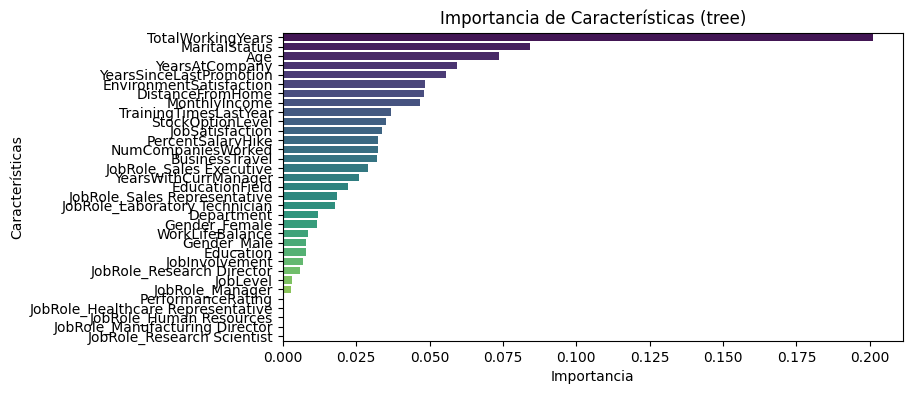

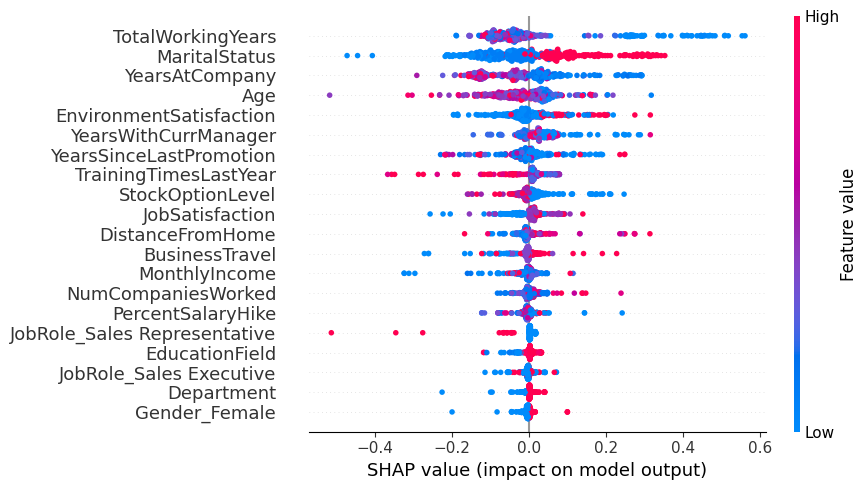

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.930052,0.930649,0.930052,0.929363,0.847404,0.980757,decision tree
test,0.772610,0.770345,0.772610,0.768824,0.510788,0.769401,decision tree
train,0.841321,0.840302,0.841321,0.838867,0.650894,0.903988,regresion logistica
test,0.821705,0.822766,0.821705,0.817859,0.614113,0.875728,regresion logistica


In [5]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


modelo_clasificacion.plot_matriz_confusion("tree")
modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

# **Random Forest**

El mejor modelo es RandomForestClassifier(max_depth=20, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
test,0.863049,0.872216,0.863049,0.858557,0.699996,0.91313


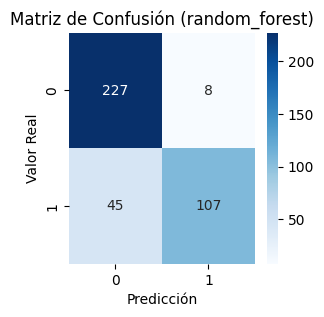

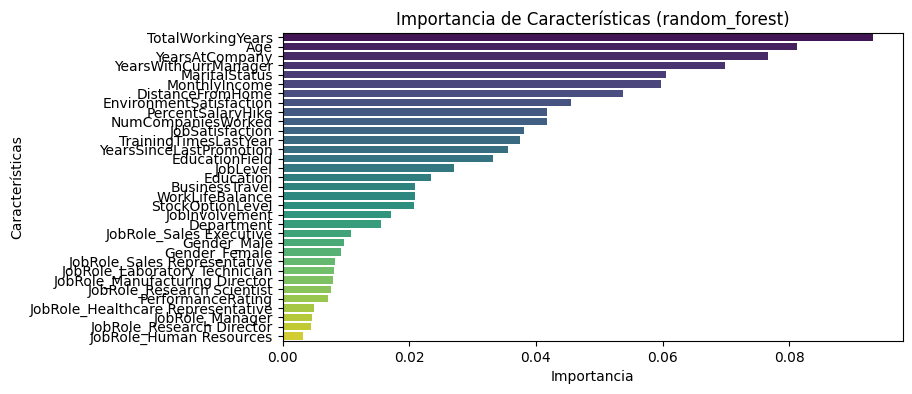

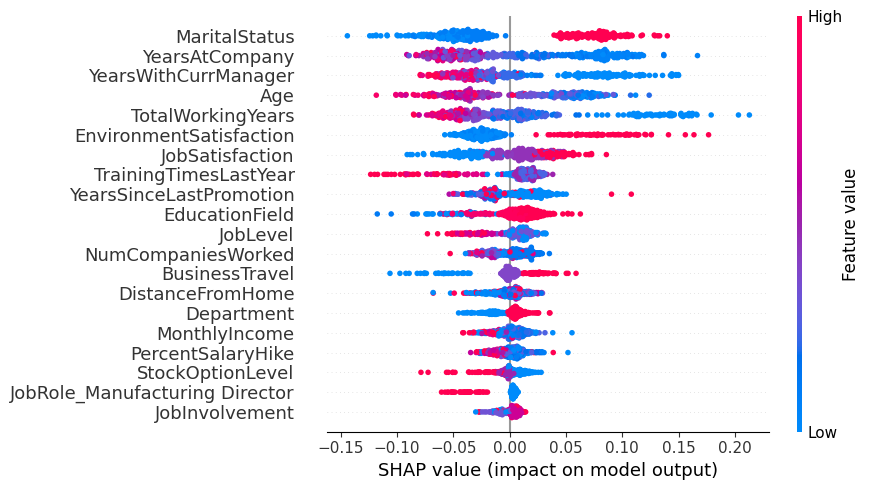

,accuracy,precision,recall,f1,kappa,auc,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random forest
test,0.863049,0.872216,0.863049,0.858557,0.699996,0.913130,random forest
train,0.930052,0.930649,0.930052,0.929363,0.847404,0.980757,decision tree
test,0.772610,0.770345,0.772610,0.768824,0.510788,0.769401,decision tree
train,0.841321,0.840302,0.841321,0.838867,0.650894,0.903988,regresion logistica
test,0.821705,0.822766,0.821705,0.817859,0.614113,0.875728,regresion logistica


In [6]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")
modelo_clasificacion.importancia_predictores(modelo_nombre ='random_forest')
modelo_clasificacion.plot_shap_summary(modelo_nombre="random_forest")


df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

### **XGBoost**

In [7]:
modelo_clasificacion.ajustar_modelo("xgboost")
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_xgboost, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
test,0.855297,0.858683,0.855297,0.852025,0.686440,0.912038,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random forest
test,0.863049,0.872216,0.863049,0.858557,0.699996,0.913130,random forest
train,0.930052,0.930649,0.930052,0.929363,0.847404,0.980757,decision tree
test,0.772610,0.770345,0.772610,0.768824,0.510788,0.769401,decision tree
train,0.841321,0.840302,0.841321,0.838867,0.650894,0.903988,regresion logistica
test,0.821705,0.822766,0.821705,0.817859,0.614113,0.875728,regresion logistica


Una vez hemos agrupado todas las métricas en un mismo df vamos a ponerlas distintos colores para verlas mejor y analizarlas.

### **Gradient Boosting**

In [8]:
modelo_clasificacion.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200,
                           subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient boosting
test,0.883721,0.888284,0.883721,0.881212,0.748335,0.911506,gradient boosting
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
test,0.855297,0.858683,0.855297,0.852025,0.686440,0.912038,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random forest
test,0.863049,0.872216,0.863049,0.858557,0.699996,0.913130,random forest
train,0.930052,0.930649,0.930052,0.929363,0.847404,0.980757,decision tree
test,0.772610,0.770345,0.772610,0.768824,0.510788,0.769401,decision tree
train,0.841321,0.840302,0.841321,0.838867,0.650894,0.903988,regresion logistica
test,0.821705,0.822766,0.821705,0.817859,0.614113,0.875728,regresion logistica


## **Resumen:**

In [ ]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(fpc.color_filas_con_borde, axis=1)

df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,modelo
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient boosting
1,0.883721,0.888284,0.883721,0.881212,0.748335,0.911506,gradient boosting
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
3,0.855297,0.858683,0.855297,0.852025,0.686440,0.912038,xgboost
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random forest
5,0.863049,0.872216,0.863049,0.858557,0.699996,0.913130,random forest
6,0.930052,0.930649,0.930052,0.929363,0.847404,0.980757,decision tree
7,0.772610,0.770345,0.772610,0.768824,0.510788,0.769401,decision tree
8,0.841321,0.840302,0.841321,0.838867,0.650894,0.903988,regresion logistica
9,0.821705,0.822766,0.821705,0.817859,0.614113,0.875728,regresion logistica


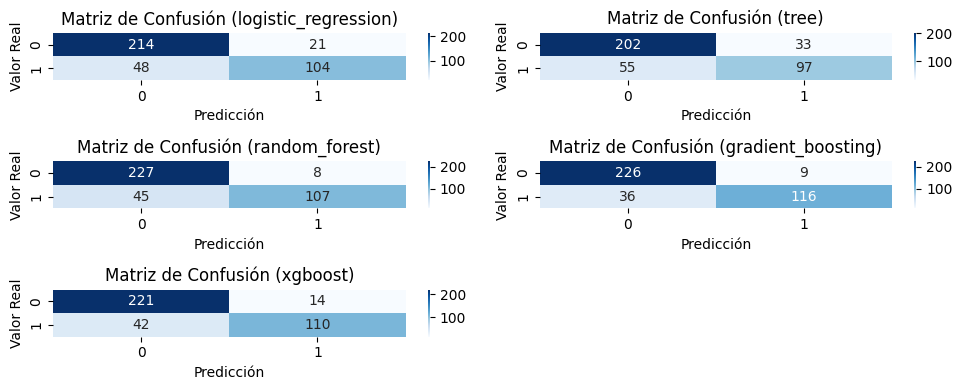

In [11]:
modelo_clasificacion.plot_all_matriz_confusion()

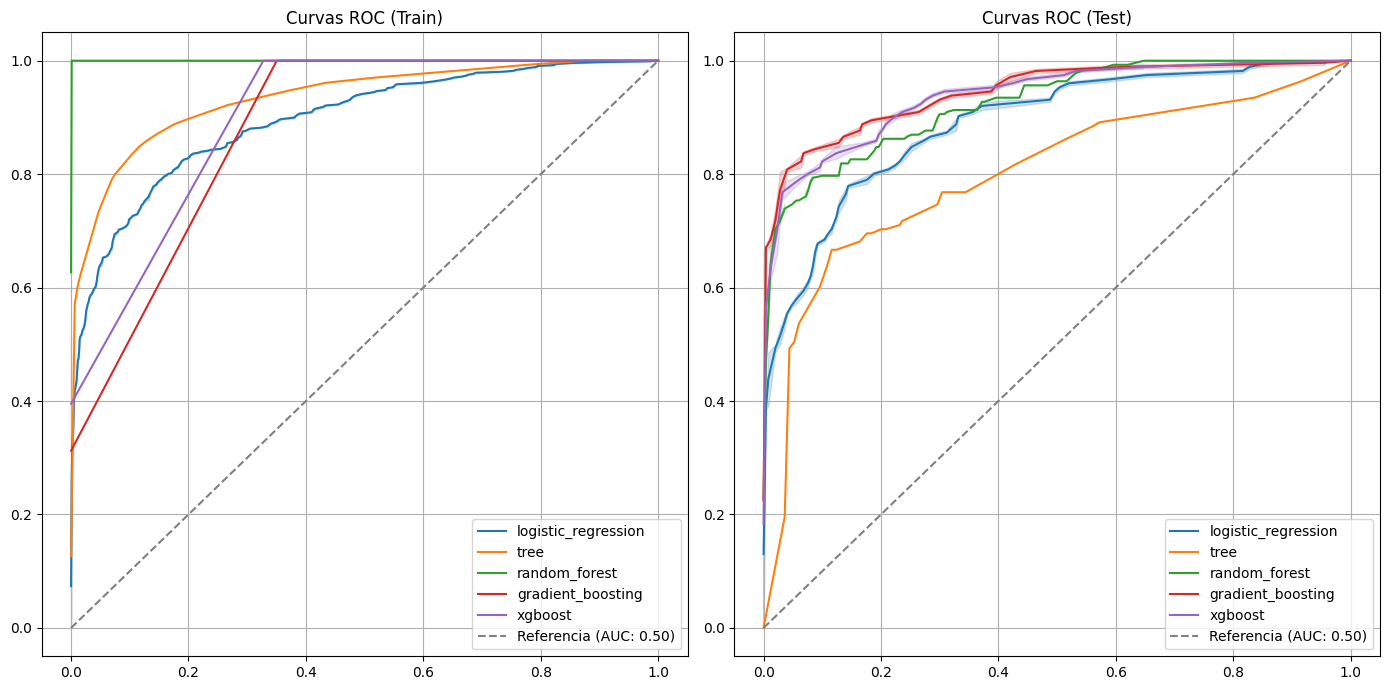

In [ ]:
modelo_clasificacion.plot_curvas_roc_train_test()

Las métricas obtenidas han empeorado respeto al modelo anterior, la única que sigue siendo parecida es la de gradient boosting, sin embargo es inferioir a la obtenida en el modelo 4 que es en el cual esta basado este modelo. Por lo que no merece la pena ponerse a reajusta parámetros. Se descarta este modelo.